<a href="https://colab.research.google.com/github/sreyeshkonduru/Datasets/blob/main/KONDURU_SREYESH_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/drive/MyDrive/5731 files/annotated_sentiment_data_final.csv")

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

features = tfidf_vectorizer.get_feature_names_out()

print("\n")
print("Features used for topic modeling:")
print(features)

with open("features_used_for_topic_modeling\n , .txt", "w") as f:
    for feature in features:
        f.write(feature + "\n")

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(tfidf)

topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_features = [features[i] for i in topic.argsort()[-10:]][::-1]
    topics.append(top_features)
    print('\n',f"Topic {topic_idx + 1}: {', '.join(top_features)}")

topic_assignments = lda_model.transform(tfidf).argmax(axis=1)
df['topic'] = topic_assignments

df.to_csv("topic_modeling_output.csv", index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




Features used for topic modeling:
['ab' 'abbrevi' 'abil' ... 'young' 'zero' 'zone']

 Topic 1: bia, bias, densiti, fair, multimod, neuroimag, discret, tensorflow, wrapper, group

 Topic 2: decisionmak, packag, client, stream, norm, subset, fair, learningbas, effort, academ

 Topic 3: quantum, elm, mtl, rl, tensor, multitask, dictionari, circuit, rbm, econom

 Topic 4: causal, textbook, nonparametr, tabl, graduat, domin, dnn, appendix, cybersecur, undergradu

 Topic 5: graph, intrus, dnn, unlabel, reproduc, second, perturb, cyber, multitask, librari

 Topic 6: librari, scikitlearn, python, automl, graphlab, packag, radio, adopt, preprocess, industri

 Topic 7: machin, data, model, algorithm, use, method, problem, network, applic, deep

 Topic 8: sentiment, python, messag, twitter, librari, nonstationar, atom, energi, molecul, tempor

 Topic 9: kernel, gp, heurist, unlabel, gaussian, net, know, transduct, maximum, naiv

 Topic 10: cancer, embed, auto, indic, irrelev, card, eld, bias, b

In [ ]:
''' Topic 1: Bias and Fairness in Multimodal Systems
Key Terms: bias, fair, tensorflow, neuroimag, multimod
Description:
This topic focuses on bias and fairness, particularly in the context of multimodal systems and neuroimaging. It explores methods and tools like TensorFlow and wrappers for addressing bias in machine learning models.

Topic 2: Decision-Making in Learning Systems
Key Terms: decisionmak, client, stream, norm, subset
Description:
This cluster pertains to decision-making processes, client systems, and streaming data. It addresses fairness, learning-based approaches, and efforts in academic contexts to improve decision-making frameworks.

Topic 3: Quantum and Multitask Learning
Key Terms: quantum, multitask, tensor, econom, circuit
Description:
This topic is centered on quantum computing and multitask learning. It includes discussions on tensors, quantum circuits, and economic applications, highlighting advancements in quantum machine learning and reinforcement learning (RL).

Topic 4: Causal Learning and Educational Applications
Key Terms: causal, textbook, nonparametr, cybersecur, undergradu
Description:
This cluster deals with causal learning and its applications in education. It includes nonparametric methods, cybersecurity, and resources like textbooks and graduate-level materials.

Topic 5: Graph Analysis and Cybersecurity
Key Terms: graph, intrus, cyber, perturb, reproduc
Description:
This topic focuses on graph-based methods and their applications in cybersecurity, particularly in intrusion detection. It also touches on reproducibility in experiments and multitask approaches.

Topic 6: Python Libraries and Automation
Key Terms: librari, scikitlearn, automl, preprocess, industri
Description:
This topic highlights Python libraries like scikit-learn and GraphLab, emphasizing their use in automation (AutoML) and preprocessing in industrial settings. It discusses the adoption of these tools across domains.

Topic 7: Core Machine Learning Concepts
Key Terms: machin, data, model, algorithm, method
Description:
This cluster encompasses the core areas of machine learning, including data modeling, algorithm development, and applications of methods in real-world problems. It is foundational to the field of ML.

Topic 8: Sentiment Analysis and Temporal Dynamics
Key Terms: sentiment, python, twitter, tempor, nonstationar
Description:
This topic focuses on sentiment analysis, particularly in social media contexts like Twitter. It also includes temporal dynamics and the challenges of nonstationary data in time-series analysis.

Topic 9: Kernel Methods and Gaussian Processes
Key Terms: kernel, gaussian, transduct, maximum, heurist
Description:
This cluster revolves around kernel-based methods, Gaussian processes (GP), and transductive learning. It discusses heuristic approaches for working with labeled and unlabeled data.

Topic 10: Biomedical Applications and Embeddings
Key Terms: cancer, embed, auto, card, branch
Description:
This topic focuses on biomedical applications, with an emphasis on embeddings and their use in cancer research. It also includes auto-related studies and other medical indicators.'''

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [7]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/drive/MyDrive/5731 files/annotated_sentiment_data_final.csv")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf1 = LogisticRegression(max_iter=500, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf1_cv_scores = cross_val_score(clf1, X_train, y_train, cv=skf, scoring='accuracy')
clf2_cv_scores = cross_val_score(clf2, X_train, y_train, cv=skf, scoring='accuracy')

print("Logistic Regression CV Accuracy: ", np.mean(clf1_cv_scores))
print("Random Forest CV Accuracy: ", np.mean(clf2_cv_scores))

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance of {model_name}:")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
    print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred1, "Logistic Regression")
evaluate_model(y_test, y_pred2, "Random Forest")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Logistic Regression CV Accuracy:  0.46053639846743294
Random Forest CV Accuracy:  0.5221780135573239

Performance of Logistic Regression:
Accuracy:  0.5205479452054794
Precision:  0.5112447885646219
Recall:  0.5205479452054794
F1 Score:  0.5039140872035407

Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.69      0.61        78
    positive       0.48      0.32      0.39        68

    accuracy                           0.52       146
   macro avg       0.51      0.51      0.50       146
weighted avg       0.51      0.52      0.50       146


Performance of Random Forest:
Accuracy:  0.4657534246575342
Precision:  0.4417808219178082
Recall:  0.4657534246575342
F1 Score:  0.43714843491496264

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.68      0.58        78
    positive       0.38      0.22      0.28        68

    accuracy                           0.47       1

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

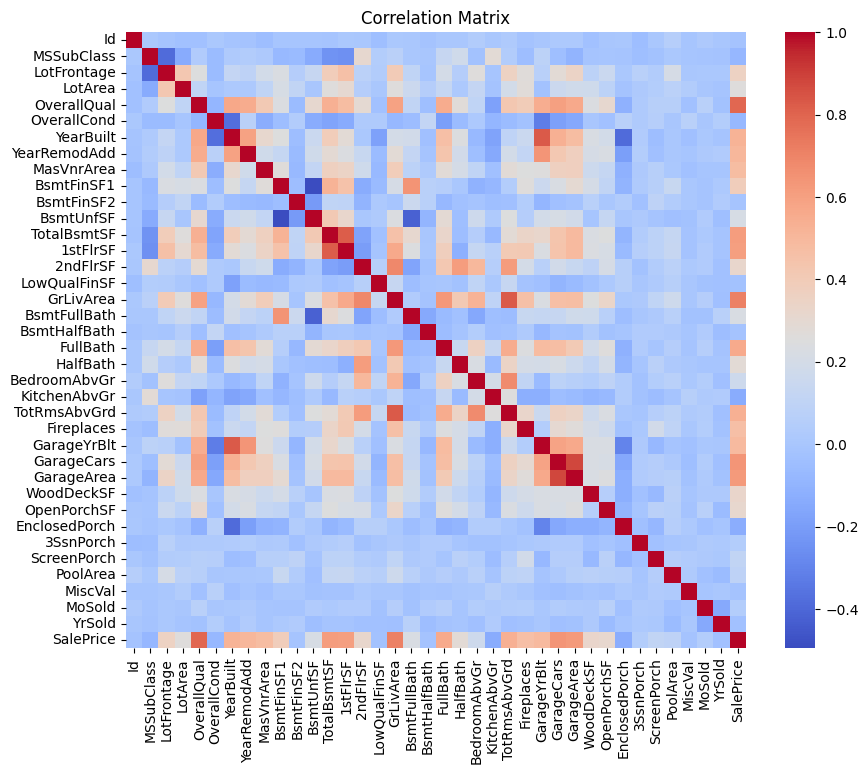


Model Performance:
Train RMSE: 37785.10531612486
Validation RMSE: 39558.88050828616
Validation R²: 0.795979338453358

Predictions saved to 'submission.csv'


<ipython-input-10-d77773f44bbd>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["LotFrontage"].fillna(train_data["LotFrontage"].median(), inplace=True)
<ipython-input-10-d77773f44bbd>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [10]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

train_data = pd.read_csv('//content/drive/MyDrive/5731 files/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/5731 files/test.csv')

print("Training Data Info:")
print(train_data.info())

missing_train = train_data.isnull().mean() * 100
print("\nColumns with missing values in training data:")
print(missing_train[missing_train > 0].sort_values(ascending=False))

numerical_columns = train_data.select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr()

saleprice_corr = correlation_matrix["SalePrice"].sort_values(ascending=False)
print("\nTop 10 features most correlated with SalePrice:")
print(saleprice_corr.head(10))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

cols_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

train_data["LotFrontage"].fillna(train_data["LotFrontage"].median(), inplace=True)
test_data["LotFrontage"].fillna(test_data["LotFrontage"].median(), inplace=True)

train_data["GarageYrBlt"].fillna(0, inplace=True)
test_data["GarageYrBlt"].fillna(0, inplace=True)

for col in train_data.select_dtypes(include="object").columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    if col in test_data.columns:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"]
X = train_data[selected_features]
y = train_data["SalePrice"]

X_test = test_data[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_val = pipeline.predict(X_val)

print("\nModel Performance:")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_val))}")
print(f"Validation R²: {r2_score(y_val, y_pred_val)}")

for col in X_test.columns:
    if X_test[col].isnull().any():
        if X_test[col].dtype in ['float64', 'int64']:
            X_test[col].fillna(X_test[col].median(), inplace=True)
        else:
            X_test[col].fillna(X_test[col].mode()[0], inplace=True)

test_data["PredictedSalePrice"] = pipeline.predict(X_test)

test_data[["Id", "PredictedSalePrice"]].to_csv("submission.csv", index=False)
print("\nPredictions saved to 'submission.csv'")

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
''' For the data set that we have created in the Assignmnet 3, We are using RoBERTa model.RoBERTa was pre-trained on a vast corpus of text data,
including the BookCorpus, CC-News, OpenWebText, and STORIES datasets. Combined, these datasets amount to over 160GB of uncompressed text,
significantly larger than the dataset used for pretraining BERT. RoBERTa-large has 355 million parameters. For this task, RoBERTa-base was
selected to balance computational efficiency and performance.'''

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

data = pd.read_csv("/content/drive/MyDrive/5731 files/sentiment_analysis_data.csv", encoding='ISO-8859-1')
labels = data["Sentiment"].tolist()

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ["Positive", "Negative", "Neutral"]

predictions = []
for text in texts:
    result = classifier(text, candidate_labels)
    predicted_label = result["labels"][0]
    predictions.append(predicted_label)

def map_label(label):
    if label == "Positive":
        return 1
    elif label == "Negative":
        return -1
    else:
        return 0

predicted_labels = list(map(map_label, predictions))
ground_truth_labels = list(map(map_label, labels))

accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(ground_truth_labels, predicted_labels, average=None, labels=[1, -1, 0])

print("Accuracy:", accuracy)
print("Precision (Positive, Negative, Neutral):", precision)
print("Recall (Positive, Negative, Neutral):", recall)
print("F1 Score (Positive, Negative, Neutral):", f1)


In [ ]:
'''Advantages:

Pretrained Knowledge: RoBERTa's training on diverse and large-scale datasets enables it to generalize well to various tasks in a zero-shot
setting without the need for task-specific fine-tuning.

Performance: Achieves strong performance metrics even without fine-tuning, showcasing the effectiveness of its robust pretraining.

Flexibility: RoBERTa's implementation in Hugging Face makes it user-friendly and accessible for integration into various workflows.




Disadvantages:

Computational Overhead: Despite its capabilities, RoBERTa can be resource-intensive to run, especially for large datasets or when using the
larger versions of the model.

Limited Interpretability: While RoBERTa achieves high performance, understanding why it predicts a particular sentiment can be challenging
due to the complexity of the model.

Dependency on Pretraining Data: The model may inherit biases present in its pretraining data, which could affect its predictions in specific
domains.



Challenges faced:

The main challenge that was encountered in this RoBERTa is the presence of abstracts with ambiguous sentiments (e.g., a mix of positive and
negative tones)
